In [17]:
import numpy as np
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
sentences = np.load('bert_sentence_embeddings.npy')
labels = np.load('labels.npy')

X_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, shuffle=True)

clf = xgb.XGBClassifier(max_depth = 12, n_estimators=20)
weights = compute_sample_weight(class_weight='balanced', y=y_train)

clf.fit(X_train, y_train, sample_weight=weights)

[16:58:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best F1 =  0.41797752808988764
precision =  0.34572490706319703
recall =  0.5284090909090909


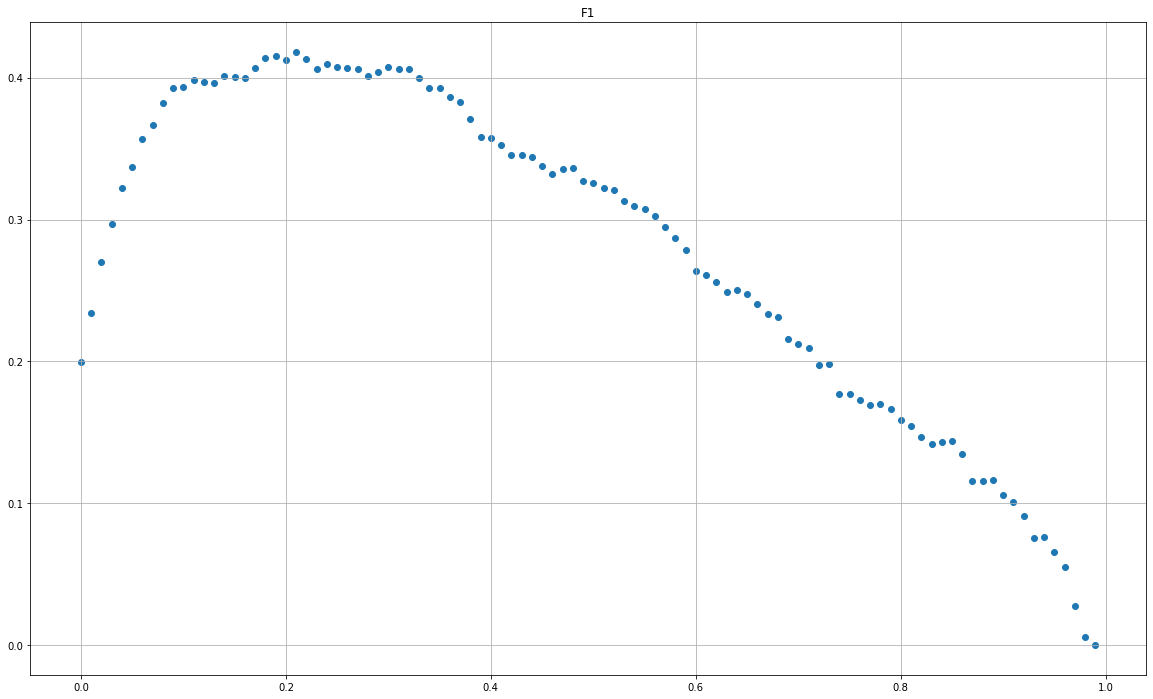

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = clf.predict_proba(x_test)
def preds_with_tr(tr, proba):
    pr = proba[:, 1]
    ans = (pr>tr).astype(int)
    return ans

precisions = []
recalls = []
f1s = []
for t in np.arange(0.,1.,0.01):
    prediction = preds_with_tr(t, proba)
    precisions.append(precision_score(y_test, list(prediction)))
    recalls.append(recall_score(y_test, list(prediction)))
    f1s.append(f1_score(y_test, list(prediction)))
    
print('best F1 = ', max(f1s))
i = np.array(f1s).argmax()
print('precision = ', precisions[i])
print('recall = ', recalls[i])


plt.figure(figsize = (20,12))
plt.grid()
plt.title('F1')
plt.scatter(np.arange(0.,1.,0.01), f1s)
plt.show()

0.40498442367601245

(15881,)